In [44]:
import sys
import csv
import math
import random
import operator
import time
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from random import seed, shuffle, randrange

# Preprocesing

Features:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: 

    1. Iris Setosa
    2. Iris Virginica

In [3]:
df = pd.read_csv("./data/iris_clean.csv")

In [4]:
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,Iris-virginica
96,6.3,2.5,5.0,1.9,Iris-virginica
97,6.5,3.0,5.2,2.0,Iris-virginica
98,6.2,3.4,5.4,2.3,Iris-virginica


# Perceptron

## 10-fold-stratiﬁed-cross-validation

"Stratification is the process of rearranging the data as to ensure each fold is a good representative of the whole. For example in a binary classification problem where each class comprises 50% of the data, it is best to arrange the data such that in every fold, each class comprises around half the instances."

In [5]:
df['class'] = df['class'].map({'Iris-setosa': 0, 'Iris-virginica': 1})

In [6]:
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,1
96,6.3,2.5,5.0,1.9,1
97,6.5,3.0,5.2,2.0,1
98,6.2,3.4,5.4,2.3,1


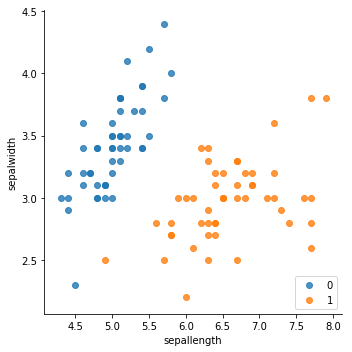

In [45]:
sns.lmplot(x="sepallength", y="sepalwidth", data=df, fit_reg=False, hue='class', legend=False)
plt.legend(loc='lower right')

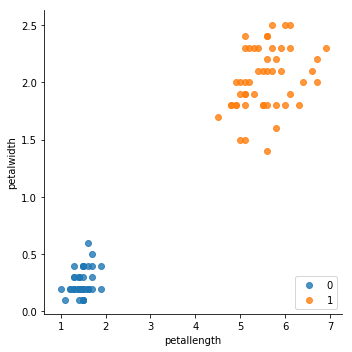

In [279]:
sns.lmplot(x="petallength", y="petalwidth", data=df, fit_reg=False, hue='class', legend=False)
plt.legend(loc='lower right')

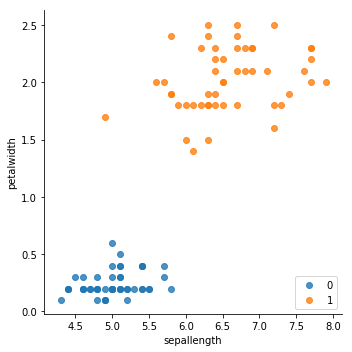

In [47]:
sns.lmplot(x="sepallength", y="sepalwidth", data=df, fit_reg=False, hue='class', legend=False)
plt.legend(loc='lower right')

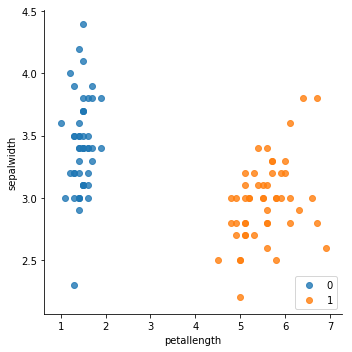

In [48]:
sns.lmplot(x="petallength", y="sepalwidth", data=df, fit_reg=False, hue='class', legend=False)
plt.legend(loc='lower right')

In [160]:
def nfscv(df, n):
    split_data = []
    data_list = df.values.tolist()
    setosa = []
    virginica = []
    for entry in data_list: #stratification
        if entry[4] == 0: #setosa
            setosa.append(entry)
        elif entry[4] == 1: #virginica
            virginica.append(entry)
    fold = int(len(data_list)/n)
    for i in range(n): 
        f = []
        while len(f) < fold:
            index1 = randrange(len(setosa))
            f.append(setosa.pop(index1))
            index2 = randrange(len(virginica))
            f.append(virginica.pop(index2))
        random.shuffle(f)
        split_data.append(f)
    return split_data

In [161]:
data = nfscv(df, 10)

Read this article to understand the logic more: https://medium.com/@thomascountz/19-line-line-by-line-python-perceptron-b6f113b161f3

In [214]:
def perceptr(train, test, learning_rate, epochs):
    preds = []
    weights = []
    for i in range(len(train[0])):
        weights.append(1.0)
    for epoch in range(epochs):
        sum_error = 0.0
        for sample in train:
            p = prediction(sample, weights)
            error = sample[4] - p
            sum_error += error**2
            confidence = 100-sum_error
            weights[0] = weights[0] + learning_rate * error
            for i in range(len(sample)-1):
                weights[i + 1] = weights[i + 1] + learning_rate * error * sample[i]
        print('for epoch %d, the error is %.1f, the confidence is %.1f' % (epoch+1, sum_error, confidence))
        pr = []
        for sample in test:
            pred = prediction(sample, weights)
            pr.append(pred)
        preds.append(pr)
    return preds

In [215]:
def prediction(sample, weights):
    act = weights[0]
    for i in range(len(sample)):
        act += weights[i] * sample[i]
    if act >= 0.0:
        return 1.0
    return 0.0

In [216]:
def accuracy(truth, predicted):
    correct = 0
    for i in range(len(truth)):
        if truth[i] == predicted[i]:
            correct += 1
    return correct/float(len(truth)) * 100.0

In [309]:
def run(df, n, learning_rate, epochs):
    folds = nfscv(df, n)
    scores = []
    for fold in folds:
        train = list(folds)
        train.remove(fold)
        train = sum(train, [])
        test = []
        truth = []
        for f in fold:
            test.append(f)
            truth.append(f[4])
        predicted = perceptr(train, test, learning_rate, epochs)
        acc = []
        for p in predicted:
            acc.append(accuracy(truth, p))
        scores.append(acc)
    return (scores, truth, predicted, folds)

In [286]:
def total_acc(results):
    all_epochs_acc = []
    for fold in results:
        epochs_acc = []
        for epoch in fold:
            epochs_acc.append(epoch)
        all_epochs_acc.append(epochs_acc)
    return all_epochs_acc

In [287]:
def epoch_accs(df):
    epoch_accs = []
    for epoch in df:
        epoch_accs.append(df[epoch].mean())
    return epoch_accs

In [310]:
results2, truth2, predicted2, folds = run(df, 10, 0.00005, 20) 

for epoch 1, the error is 45.0, the confidence is 55.0
for epoch 2, the error is 45.0, the confidence is 55.0
for epoch 3, the error is 45.0, the confidence is 55.0
for epoch 4, the error is 45.0, the confidence is 55.0
for epoch 5, the error is 45.0, the confidence is 55.0
for epoch 6, the error is 45.0, the confidence is 55.0
for epoch 7, the error is 45.0, the confidence is 55.0
for epoch 8, the error is 45.0, the confidence is 55.0
for epoch 9, the error is 45.0, the confidence is 55.0
for epoch 10, the error is 45.0, the confidence is 55.0
for epoch 11, the error is 45.0, the confidence is 55.0
for epoch 12, the error is 45.0, the confidence is 55.0
for epoch 13, the error is 45.0, the confidence is 55.0
for epoch 14, the error is 45.0, the confidence is 55.0
for epoch 15, the error is 45.0, the confidence is 55.0
for epoch 16, the error is 45.0, the confidence is 55.0
for epoch 17, the error is 45.0, the confidence is 55.0
for epoch 18, the error is 45.0, the confidence is 55.0
f

In [313]:
results_plt, truth_plt, predicted_plt, folds = run(df, 2, 0.001, 20) 

for epoch 1, the error is 25.0, the confidence is 75.0
for epoch 2, the error is 25.0, the confidence is 75.0
for epoch 3, the error is 25.0, the confidence is 75.0
for epoch 4, the error is 25.0, the confidence is 75.0
for epoch 5, the error is 25.0, the confidence is 75.0
for epoch 6, the error is 25.0, the confidence is 75.0
for epoch 7, the error is 25.0, the confidence is 75.0
for epoch 8, the error is 25.0, the confidence is 75.0
for epoch 9, the error is 25.0, the confidence is 75.0
for epoch 10, the error is 25.0, the confidence is 75.0
for epoch 11, the error is 25.0, the confidence is 75.0
for epoch 12, the error is 25.0, the confidence is 75.0
for epoch 13, the error is 25.0, the confidence is 75.0
for epoch 14, the error is 25.0, the confidence is 75.0
for epoch 15, the error is 25.0, the confidence is 75.0
for epoch 16, the error is 21.0, the confidence is 79.0
for epoch 17, the error is 9.0, the confidence is 91.0
for epoch 18, the error is 3.0, the confidence is 97.0
for

In [324]:
sl = []
sw = []
i = 0
for fold in folds:
    if i == 0:
        for f in fold:
            sl.append(f[0])
            sw.append(f[1])
    i += 1

In [325]:
# len(predicted_plt[19])
plt_df = pd.DataFrame({'class': predicted_plt[19], 'sepallength': sl, 'sepalwidth': sw})

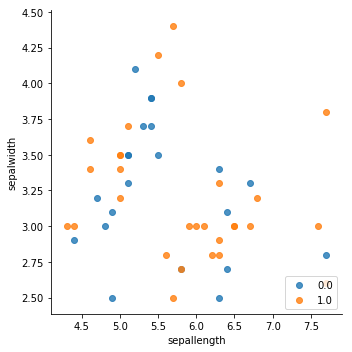

In [326]:
sns.lmplot(x="sepallength", y="sepalwidth", data=plt_df, fit_reg=False, hue='class', legend=False)
plt.legend(loc='lower right')

In [263]:
df_acc2 = pd.DataFrame(total_acc(results2))
accs_00005 = epoch_accs(df_acc2)

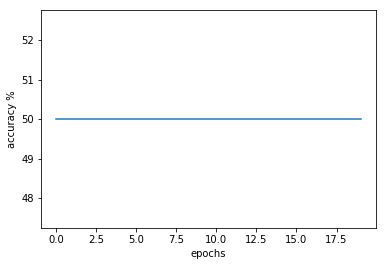

In [264]:
plt.plot(accs_00005)
plt.ylabel('accuracy %')
plt.xlabel('epochs')
plt.show()

In [265]:
results3 = run(df, 10, 0.001, 20)

for epoch 1, the error is 45.0, the confidence is 55.0
for epoch 2, the error is 45.0, the confidence is 55.0
for epoch 3, the error is 45.0, the confidence is 55.0
for epoch 4, the error is 45.0, the confidence is 55.0
for epoch 5, the error is 45.0, the confidence is 55.0
for epoch 6, the error is 45.0, the confidence is 55.0
for epoch 7, the error is 45.0, the confidence is 55.0
for epoch 8, the error is 45.0, the confidence is 55.0
for epoch 9, the error is 36.0, the confidence is 64.0
for epoch 10, the error is 8.0, the confidence is 92.0
for epoch 11, the error is 3.0, the confidence is 97.0
for epoch 12, the error is 1.0, the confidence is 99.0
for epoch 13, the error is 1.0, the confidence is 99.0
for epoch 14, the error is 1.0, the confidence is 99.0
for epoch 15, the error is 1.0, the confidence is 99.0
for epoch 16, the error is 1.0, the confidence is 99.0
for epoch 17, the error is 1.0, the confidence is 99.0
for epoch 18, the error is 1.0, the confidence is 99.0
for epoch 

In [266]:
df_acc3 = pd.DataFrame(total_acc(results3))
accs_001 = epoch_accs(df_acc3)

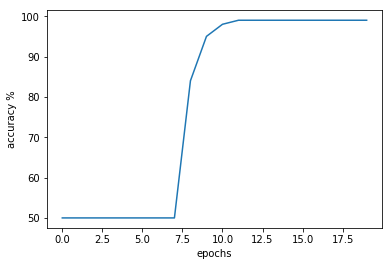

In [267]:
plt.plot(accs_001)
plt.ylabel('accuracy %')
plt.xlabel('epochs')
plt.show()

In [268]:
results1 = run(df, 10, 0.005, 20)

for epoch 1, the error is 45.0, the confidence is 55.0
for epoch 2, the error is 36.0, the confidence is 64.0
for epoch 3, the error is 2.0, the confidence is 98.0
for epoch 4, the error is 1.0, the confidence is 99.0
for epoch 5, the error is 2.0, the confidence is 98.0
for epoch 6, the error is 1.0, the confidence is 99.0
for epoch 7, the error is 2.0, the confidence is 98.0
for epoch 8, the error is 1.0, the confidence is 99.0
for epoch 9, the error is 2.0, the confidence is 98.0
for epoch 10, the error is 2.0, the confidence is 98.0
for epoch 11, the error is 1.0, the confidence is 99.0
for epoch 12, the error is 2.0, the confidence is 98.0
for epoch 13, the error is 1.0, the confidence is 99.0
for epoch 14, the error is 2.0, the confidence is 98.0
for epoch 15, the error is 1.0, the confidence is 99.0
for epoch 16, the error is 2.0, the confidence is 98.0
for epoch 17, the error is 1.0, the confidence is 99.0
for epoch 18, the error is 2.0, the confidence is 98.0
for epoch 19, the

In [269]:
df_acc1 = pd.DataFrame(total_acc(results1))
accs_005 = epoch_accs(df_acc1)

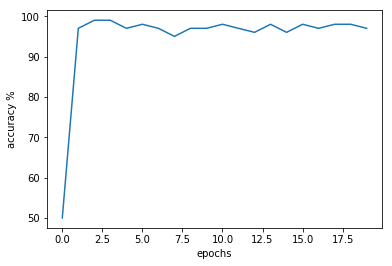

In [270]:
plt.plot(accs_005)
plt.ylabel('accuracy %')
plt.xlabel('epochs')
plt.show()